In [6]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
route_stops = pd.read_csv('../notebook/wego_route_locations.csv')
route_stops.head()

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0
0,3,1.0,36.167091,-86.781923,213
1,3,2.0,36.167091,-86.781923,40229
2,3,3.0,36.148685,-86.804611,20397
3,3,3.0,36.149007,-86.804449,20046
4,3,4.0,36.143233,-86.814581,20395


In [3]:
route_stops['geometry'] = route_stops.apply(lambda x: Point((x.LONGITUDE, x.LATITUDE)), axis=1)
route_stops.head()

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry
0,3,1.0,36.167091,-86.781923,213,POINT (-86.7819226 36.1670905)
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.7819226 36.1670905)
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461099999999 36.148685)
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80444900000001 36.149007)
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.814581 36.143233)


In [9]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [10]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
wego_stops = gpd.GeoDataFrame(route_stops,
                             crs = zipcodes.crs,
                             geometry = route_stops['geometry'])
wego_stops

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709)
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709)
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461 36.14869)
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80445 36.14901)
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.81458 36.14323)
...,...,...,...,...,...,...
176,56,11.0,36.300470,-86.695610,17300,POINT (-86.69561 36.30047)
177,56,11.0,36.307973,-86.685963,12188,POINT (-86.68596 36.30797)
178,56,12.0,36.307973,-86.685963,17326,POINT (-86.68596 36.30797)
179,56,12.0,36.300470,-86.695610,12188,POINT (-86.69561 36.30047)


In [13]:
type(wego_stops)

geopandas.geodataframe.GeoDataFrame

In [20]:
wego_stops = wego_stops.rename(columns={'0':'STOP_COUNT'})
wego_stops.head()

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,STOP_COUNT,geometry
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709)
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709)
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461 36.14869)
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80445 36.14901)
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.81458 36.14323)


In [15]:
layover_plots = pd.read_csv('../notebook/layover_plots.csv')
layover_plots.head()

,Unnamed: 0,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,AVG_HDWY_DEV
0,0,3,2.0,-0.152027
1,1,3,3.0,0.404303
2,2,3,4.0,0.376553
3,3,3,5.0,0.354509
4,4,3,6.0,6.158730


In [18]:
layover_plots = layover_plots[['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE', 'AVG_HDWY_DEV']]
layover_plots.head()                               

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,AVG_HDWY_DEV
0,3,2.0,-0.152027
1,3,3.0,0.404303
2,3,4.0,0.376553
3,3,5.0,0.354509
4,3,6.0,6.158730


In [22]:
route_stops.head()

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709)
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709)
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461 36.14869)
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80445 36.14901)
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.81458 36.14323)


In [23]:
route_and_dev = pd.merge(route_stops, layover_plots, how = 'left', on=['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE'])
route_and_dev

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry,AVG_HDWY_DEV
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709),NaN
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709),-0.152027
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461 36.14869),0.404303
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80445 36.14901),0.404303
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.81458 36.14323),0.376553
...,...,...,...,...,...,...,...
176,56,11.0,36.300470,-86.695610,17300,POINT (-86.69561 36.30047),0.224818
177,56,11.0,36.307973,-86.685963,12188,POINT (-86.68596 36.30797),0.224818
178,56,12.0,36.307973,-86.685963,17326,POINT (-86.68596 36.30797),0.318349
179,56,12.0,36.300470,-86.695610,12188,POINT (-86.69561 36.30047),0.318349


In [24]:
route_and_dev_geo = gpd.GeoDataFrame(route_and_dev,
                             crs = zipcodes.crs,
                             geometry = route_and_dev['geometry'])
route_and_dev_geo

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry,AVG_HDWY_DEV
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709),NaN
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709),-0.152027
2,3,3.0,36.148685,-86.804611,20397,POINT (-86.80461 36.14869),0.404303
3,3,3.0,36.149007,-86.804449,20046,POINT (-86.80445 36.14901),0.404303
4,3,4.0,36.143233,-86.814581,20395,POINT (-86.81458 36.14323),0.376553
...,...,...,...,...,...,...,...
176,56,11.0,36.300470,-86.695610,17300,POINT (-86.69561 36.30047),0.224818
177,56,11.0,36.307973,-86.685963,12188,POINT (-86.68596 36.30797),0.224818
178,56,12.0,36.307973,-86.685963,17326,POINT (-86.68596 36.30797),0.318349
179,56,12.0,36.300470,-86.695610,12188,POINT (-86.69561 36.30047),0.318349


In [25]:
type(route_and_dev_geo)

geopandas.geodataframe.GeoDataFrame

In [26]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [27]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [28]:
routes_geo_map = gpd.sjoin(route_and_dev_geo, zipcodes, op = 'within')
routes_geo_map.head()

/Users/prestonspencer/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry,AVG_HDWY_DEV,index_right,zip,po_name
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709),NaN,24,37219,NASHVILLE
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709),-0.152027,24,37219,NASHVILLE
12,7,1.0,36.167091,-86.781923,196,POINT (-86.78192 36.16709),NaN,24,37219,NASHVILLE
13,7,2.0,36.167091,-86.781923,13509,POINT (-86.78192 36.16709),-0.898215,24,37219,NASHVILLE
14,7,3.0,36.167091,-86.781923,20640,POINT (-86.78192 36.16709),0.583405,24,37219,NASHVILLE


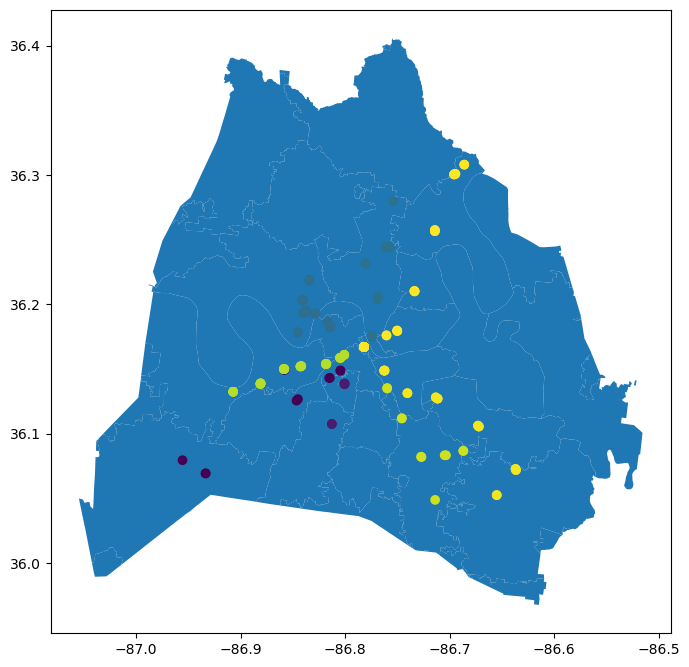

In [29]:
ax = zipcodes.plot(figsize = (8, 10))
routes_geo_map.plot(ax = ax, column = 'ROUTE_ABBR')
plt.show();

In [30]:
zipcodes.geometry.centroid

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_8111/3801680343.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes.geometry.centroid


0     POINT (-86.69477 36.25433)
1     POINT (-86.72635 36.21605)
2     POINT (-86.77467 36.10566)
3     POINT (-86.78551 36.04148)
4     POINT (-87.02866 36.00026)
5     POINT (-87.03712 36.08997)
6     POINT (-86.86263 36.38001)
7     POINT (-86.97531 36.06283)
8     POINT (-86.76433 36.33621)
9     POINT (-86.80157 36.13335)
10    POINT (-86.63653 35.98113)
11    POINT (-86.72226 36.00938)
12    POINT (-86.91816 36.15605)
13    POINT (-86.73098 36.18090)
14    POINT (-86.69470 36.00387)
15    POINT (-86.85733 36.37882)
16    POINT (-86.72570 36.00942)
17    POINT (-86.66093 36.10779)
18    POINT (-86.82996 36.27880)
19    POINT (-86.78726 36.28724)
20    POINT (-86.89487 36.32034)
21    POINT (-86.68513 35.99434)
22    POINT (-86.64118 36.25192)
23    POINT (-86.98674 36.15655)
24    POINT (-86.78317 36.16682)
25    POINT (-86.68331 35.99201)
26    POINT (-86.76289 36.39920)
27    POINT (-86.89039 36.20505)
28    POINT (-86.52221 36.13926)
29    POINT (-86.67866 35.98840)
30    POIN

In [31]:
center = zipcodes.geometry.centroid[24]
print(center)

POINT (-86.78317337070099 36.16681838008157)


/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_8111/331204971.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcodes.geometry.centroid[24]


In [32]:
area_center = [center.y, center.x]
print(area_center)

[36.16681838008157, -86.783173370701]


In [33]:
map_routes = folium.Map(location = area_center, zoom_start = 12)
map_routes

In [38]:
map_wego_stops = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map_routes)

for row_index, row_values in routes_geo_map.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = str(row_values['AVG_HDWY_DEV'])
    icon = folium.Icon(color='blue', icon='bus', prefix='fa')
    
    marker = folium.Marker(location = loc,
                          popup = pop,
                          icon = icon)
    
    marker.add_to(map_wego_stops)
map_wego_stops.save('../data/map_wego_stops.html')

map_wego_stops

In [39]:
routes_geo_map.head()

,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,LATITUDE,LONGITUDE,0,geometry,AVG_HDWY_DEV,index_right,zip,po_name
0,3,1.0,36.167091,-86.781923,213,POINT (-86.78192 36.16709),NaN,24,37219,NASHVILLE
1,3,2.0,36.167091,-86.781923,40229,POINT (-86.78192 36.16709),-0.152027,24,37219,NASHVILLE
12,7,1.0,36.167091,-86.781923,196,POINT (-86.78192 36.16709),NaN,24,37219,NASHVILLE
13,7,2.0,36.167091,-86.781923,13509,POINT (-86.78192 36.16709),-0.898215,24,37219,NASHVILLE
14,7,3.0,36.167091,-86.781923,20640,POINT (-86.78192 36.16709),0.583405,24,37219,NASHVILLE


In [40]:
routes_geo_map['AVG_HDWY_DEV'].describe()

count    155.000000
mean       0.196404
std        2.021103
min      -11.445834
25%        0.148999
50%        0.332841
75%        0.595494
max        6.158730
Name: AVG_HDWY_DEV, dtype: float64